In [0]:
# Data Maniputaltion packages
import numpy as np
import pandas as pd

# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Learning Packages
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from catboost import CatBoostClassifier, Pool, cv

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [234]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

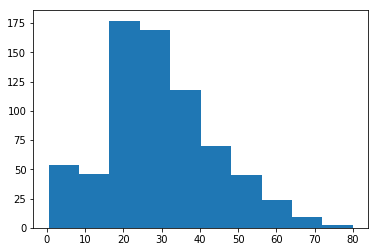

In [236]:
plt.hist(train["Age"])

(array([385., 177., 139.,  31.,  41.,  26.,  31.,   8.,  11.,   4.,   7.,
          9.,   2.,   0.,   0.,   0.,   4.,   5.,   0.,   2.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <a list of 40 Patch objects>)

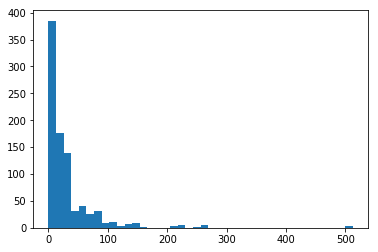

In [237]:
plt.hist(train["Fare"], bins=40)

In [238]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


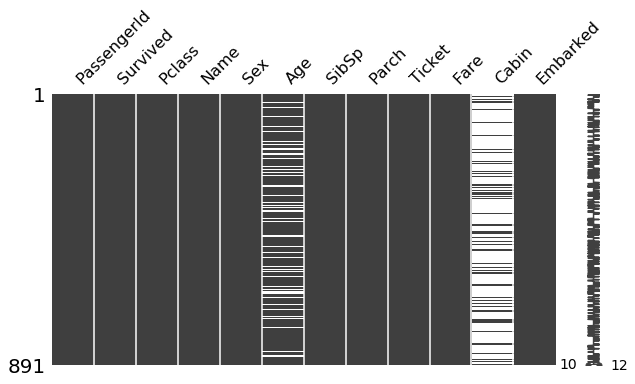

In [239]:
msno.matrix(train, figsize=(10,5))

In [240]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
df1 = train.drop(labels=["Cabin", "PassengerId", "Ticket", "Name"], axis=1)

In [243]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [244]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


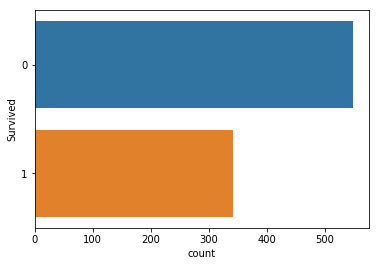

In [245]:
sns.countplot(y="Survived", data=df1)
print(pd.value_counts(df1["Survived"]))

3    491
1    216
2    184
Name: Pclass, dtype: int64


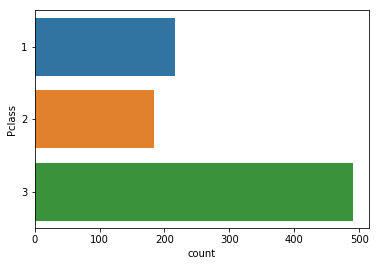

In [246]:
print(pd.value_counts(df1["Pclass"]))
sns.countplot(y="Pclass", data=df1)

In [247]:
df1[["Pclass", "Fare"]]

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
5,3,8.4583
6,1,51.8625
7,3,21.0750
8,3,11.1333
9,2,30.0708


In [248]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


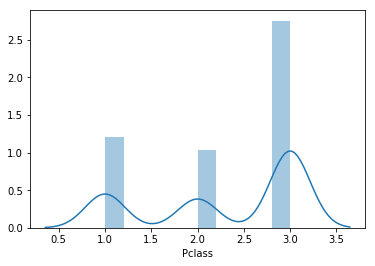

In [249]:
sns.distplot(train.Pclass)

In [250]:
sum(df1["Pclass"].isnull())

0

male      577
female    314
Name: Sex, dtype: int64


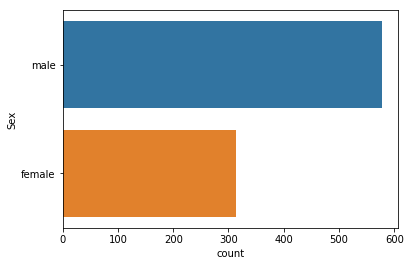

In [251]:
sns.countplot(y="Sex", data=df1)
print(pd.value_counts(df1["Sex"]))

In [252]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
df1["Sex_num"] = (train["Sex"] == "male") * 1


In [0]:
#df1.head()

In [0]:
#df1["Sex_Num"] = np.where(train["Sex"] == "female", 1, 0)

In [256]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [257]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
Sex_num,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


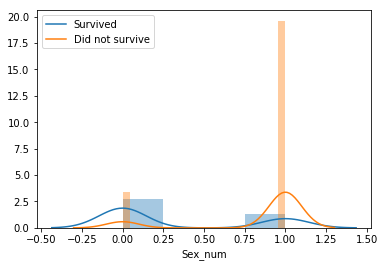

In [258]:
sns.distplot(df1.loc[df1["Survived"] == 1]["Sex_num"], kde_kws={'label': 'Survived'})
sns.distplot(df1.loc[df1["Survived"] == 0]["Sex_num"], kde_kws={'label': 'Did not survive'})

In [0]:
df1.drop("Sex", inplace=True, axis=1)

In [260]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_num
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [261]:
df1["Age"].isnull().sum()

177

In [0]:
df2 = df1.copy()
df2["Age"] = df2["Age"].fillna(df1["Age"].mean())

In [263]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_num
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [0]:
df3 = df1.copy()
df3.dropna(axis=0, inplace=True)
df2.dropna(axis=0, inplace=True)

In [265]:
df3.shape

(712, 8)

In [266]:
df2.shape

(889, 8)

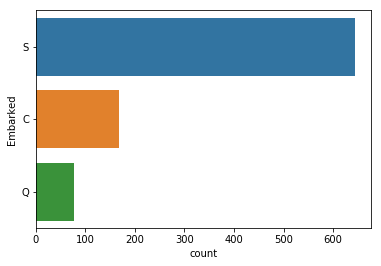

In [267]:
sns.countplot(y="Embarked", data=train);

## Feature encoding

In [0]:
df2.rename(columns={'Sex_num': 'Sex'}, inplace=True)
df3.rename(columns={'Sex_num': 'Sex'}, inplace=True)

In [0]:
def one_hot_encoder(df, col_list):
  for col in col_list:
    one_hot_col = pd.get_dummies(df[col], col)
    df = pd.concat([df, one_hot_col], axis=1)
  df.drop(col_list, axis=1, inplace=True)
  return df

In [0]:
df2_encoded = one_hot_encoder(df2, ["Embarked", "Sex", "Pclass"])
df3_encoded = one_hot_encoder(df3, ["Embarked", "Sex", "Pclass"])

In [271]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [272]:
df2_encoded.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [273]:
df2_encoded.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_0         0
Sex_1         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [274]:
df3_encoded.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_0         0
Sex_1         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [275]:
df2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Sex         0
dtype: int64

In [0]:
X_train_df2 = df2_encoded.drop(["Survived", "Age"], axis=1)
y_train_df2 = df2_encoded["Survived"]

X_train_df3 = df3_encoded.drop(["Survived", "Age"], axis=1)
y_train_df3 = df3_encoded["Survived"]

In [277]:
X_train_df2.shape

(889, 11)

In [278]:
y_train_df2.shape

(889,)

In [279]:
# Naive-Bayes

gnb_df2 = GaussianNB()

pred_df2 = gnb_df2.fit(X_train_df2, y_train_df2).predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(gnb_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("Naive-Bayes accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("Naive-Bayes CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

Naive-Bayes accuracy:  0.7851518560179978
Naive-Bayes CV 10 fold score 0.7795275590551181


In [280]:
# Naive-Bayes

gnb_df3 = GaussianNB()

pred_df3 = gnb_df3.fit(X_train_df3, y_train_df3).predict(X_train_df3)

pred_cv_df3 = model_selection.cross_val_predict(gnb_df3, X_train_df3, y_train_df3, cv=10, n_jobs=-1)
 

print("Naive-Bayes accuracy: ", accuracy_score(y_train_df3, pred_df3, normalize=True))
print("Naive-Bayes CV 10 fold score", accuracy_score(y_train_df3, pred_cv_df3, normalize=True) )

Naive-Bayes accuracy:  0.7724719101123596
Naive-Bayes CV 10 fold score 0.7696629213483146


In [0]:
df2.shape # nan's not removed
df3.shape # nan's removed

(712, 8)

In [0]:
# Logistic Regression


logistic_df2 = LogisticRegression()

pred_df2 = logistic_df2.fit(X_train_df2, y_train_df2).predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(logistic_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("Logistic Regression accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("Logistic Regression CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

Logistic Regression accuracy:  0.7997750281214848
Logistic Regression CV 10 fold score 0.7941507311586051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Logistic Regression

logistic_df3 = LogisticRegression()

pred_df3 = logistic_df3.fit(X_train_df3, y_train_df3).predict(X_train_df3)

pred_cv_df3 = model_selection.cross_val_predict(logistic_df3, X_train_df3, y_train_df3, cv=10, n_jobs=-1)
 

print("Logistic Regression accuracy: ", accuracy_score(y_train_df3, pred_df3, normalize=True))
print("Logistic Regression CV 10 fold score", accuracy_score(y_train_df3, pred_cv_df3, normalize=True) )

Logistic Regression accuracy:  0.7808988764044944
Logistic Regression CV 10 fold score 0.7682584269662921


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# KNeighbors

knn_df2 = KNeighborsClassifier()

pred_df2 = knn_df2.fit(X_train_df2, y_train_df2).predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(knn_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("KNN accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("KNN Regression CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

KNN accuracy:  0.8346456692913385
KNN Regression CV 10 fold score 0.7671541057367829


In [0]:
# KNeighbors

knn_df3 = KNeighborsClassifier()

pred_df3 = knn_df3.fit(X_train_df3, y_train_df3).predict(X_train_df3)

pred_cv_df3 = model_selection.cross_val_predict(knn_df3, X_train_df3, y_train_df3, cv=10, n_jobs=-1)
 

print("KNN Regression accuracy: ", accuracy_score(y_train_df3, pred_df3, normalize=True))
print("KNN Regression CV 10 fold score", accuracy_score(y_train_df3, pred_cv_df3, normalize=True) )

KNN Regression accuracy:  0.8230337078651685
KNN Regression CV 10 fold score 0.7528089887640449


In [0]:
# SVC

svc_df2 = LinearSVC()

pred_df2 = svc_df2.fit(X_train_df2, y_train_df2).predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(svc_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("SVC accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("SVC Regression CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC accuracy:  0.7795275590551181
SVC Regression CV 10 fold score 0.7806524184476941


In [0]:
# Stochastic Gradient Descent

sgd_df2 = SGDClassifier()

pred_df2 = sgd_df2.fit(X_train_df2, y_train_df2).predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(sgd_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("SGD accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("SGD Regression CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

SGD accuracy:  0.7919010123734533
SGD Regression CV 10 fold score 0.7199100112485939


In [0]:
# Decision Tree Classifier

tree_df2 = DecisionTreeClassifier()

pred_df2 = tree_df2.fit(X_train_df2, y_train_df2).predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(tree_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("SGD accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("SGD Regression CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

SGD accuracy:  0.9246344206974129
SGD Regression CV 10 fold score 0.8031496062992126


In [281]:
# Gradient Boosted Trees

grad_tree_df2 = GradientBoostingClassifier()

grad_tree_model = grad_tree_df2.fit(X_train_df2, y_train_df2)

pred_df2 = grad_tree_model.predict(X_train_df2)

pred_cv_df2 = model_selection.cross_val_predict(grad_tree_df2, X_train_df2, y_train_df2, cv=10, n_jobs=-1)
 

print("SGD accuracy: ", accuracy_score(y_train_df2, pred_df2, normalize=True))
print("SGD Regression CV 10 fold score", accuracy_score(y_train_df2, pred_cv_df2, normalize=True) )

SGD accuracy:  0.8661417322834646
SGD Regression CV 10 fold score 0.8065241844769404


In [0]:
# Gradient Boosted Trees

grad_tree_df3 = GradientBoostingClassifier()

pred_df3 = grad_tree_df3.fit(X_train_df3, y_train_df3).predict(X_train_df3)

pred_cv_df3 = model_selection.cross_val_predict(grad_tree_df3, X_train_df3, y_train_df3, cv=10, n_jobs=-1)
 

print("SGD accuracy: ", accuracy_score(y_train_df3, pred_df3, normalize=True))
print("SGD Regression CV 10 fold score", accuracy_score(y_train_df3, pred_cv_df3, normalize=True) )

SGD accuracy:  0.8665730337078652
SGD Regression CV 10 fold score 0.7851123595505618


In [0]:
fea_imp = pd.DataFrame({"imp": grad_tree_df2.feature_importances_, "col": X_train_df2.columns})


In [0]:
fea_imp = fea_imp.sort_values('imp')

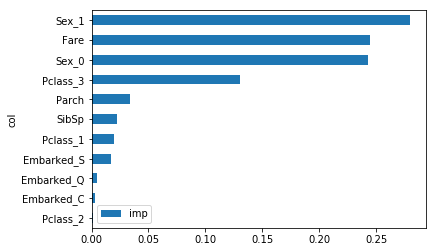

In [284]:
fea_imp.plot(kind = 'barh', x='col', y='imp')

In [0]:
from sklearn.metrics import classification_report

In [286]:
print(classification_report(y_train_df2, pred_cv_df2, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.80      0.66      0.72       340
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.80      0.66      0.72       340
   macro avg       0.27      0.22      0.24       340
weighted avg       0.80      0.66      0.72       340



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/m

In [288]:
X_train_df2.head()

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [0]:
test1 = test.copy()
test1["Sex"] = (test["Sex"] == "male") * 1
#test1.drop("Sex", inplace=True, axis=1)

In [300]:
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
test_encoded = one_hot_encoder(test1, ["Embarked", "Sex", "Pclass"])

In [302]:
test_encoded.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,0,0,1


In [0]:
test_encoded = test_encoded[X_train_df2.columns]

In [304]:
test_encoded.head()

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,0,0,7.8292,0,1,0,0,1,0,0,1
1,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,1,12.2875,0,0,1,1,0,0,0,1


In [0]:
test_encoded["Fare"].fillna(np.mean(test_encoded["Fare"]), inplace=True)

In [306]:
test_encoded.isnull().sum()

SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_0         0
Sex_1         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [0]:
predictions = grad_tree_model.predict(test_encoded)

In [309]:
predictions[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [0]:
submit_kaggle = pd.DataFrame()
submit_kaggle['PassengerId'] = test['PassengerId']
submit_kaggle["Survived"] = predictions

In [314]:
submit_kaggle.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [316]:
submit_kaggle.shape

(418, 2)

In [318]:
test.shape

(418, 11)

In [0]:
submit_kaggle.to_csv('gradient_boosted_tree.csv', index=False)

In [320]:
pd.read_csv('gradient_boosted_tree.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
